### L1/L2范数

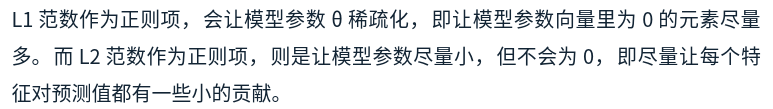

In [1]:
import matplotlib.pyplot as plt
import numpy as np

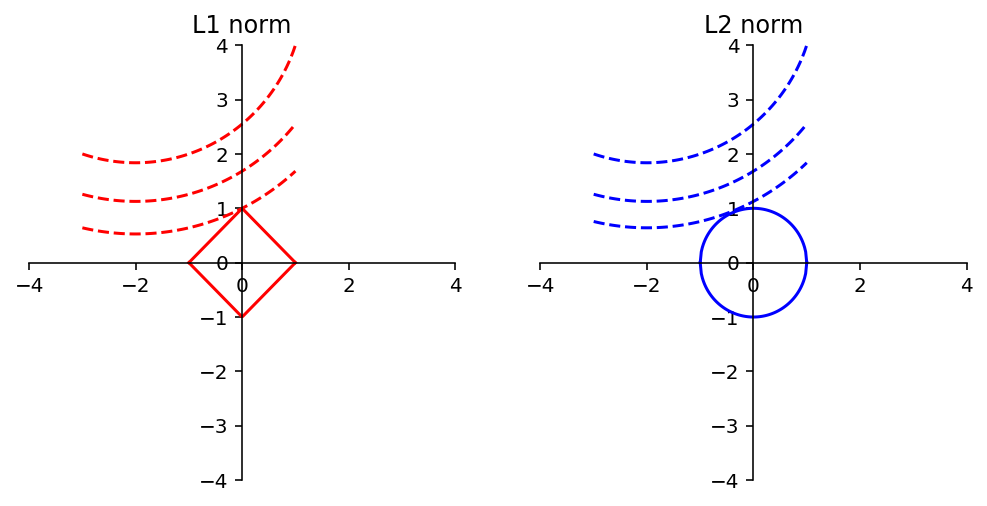

In [2]:
def L1(x):
    return 1 - np.abs(x)

def L2(x):
    return np.sqrt(1 - np.power(x, 2))

def contour(v, x):
    return 5 - np.sqrt(v - np.power(x + 2, 2))    # 4x1^2 + 9x2^2 = v

def format_spines(title):    
    ax = plt.gca()                                  # gca 代表当前坐标轴，即 'get current axis'
    ax.spines['right'].set_color('none')            # 隐藏坐标轴
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')           # 设置刻度显示位置
    ax.spines['bottom'].set_position(('data',0))    # 设置下方坐标轴位置
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data',0))      # 设置左侧坐标轴位置

    plt.title(title)
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)

plt.figure(figsize=(8.4, 4), dpi=144)

x = np.linspace(-1, 1, 100)
cx = np.linspace(-3, 1, 100)

plt.subplot(1, 2, 1)
format_spines('L1 norm')
plt.plot(x, L1(x), 'r-', x, -L1(x), 'r-')
plt.plot(cx, contour(20, cx), 'r--', cx, contour(15, cx), 'r--', cx, contour(10, cx), 'r--')

plt.subplot(1, 2, 2)
format_spines('L2 norm')
plt.plot(x, L2(x), 'b-', x, -L2(x), 'b-')
plt.plot(cx, contour(19, cx), 'b--', cx, contour(15, cx), 'b--', cx, contour(10, cx), 'b--')

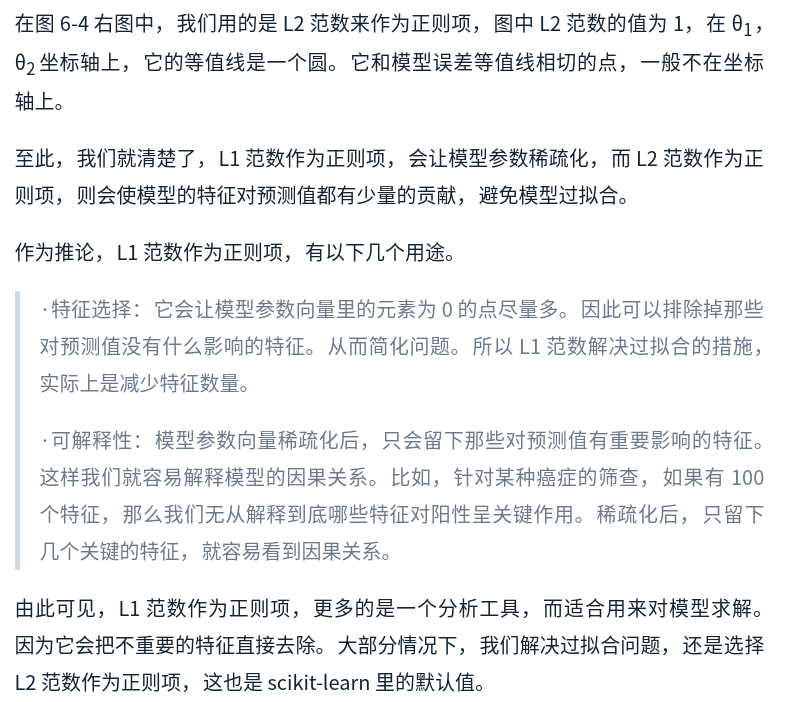

### 乳腺癌检测

In [3]:
#载入数据
from sklearn.datasets import load_breast_cancer

In [4]:
cancer = load_breast_cancer()

In [9]:
X = cancer.data
y = cancer.target

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [18]:
#训练模型
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)

train_score = model.score(X_train,y_train)
test_score = model.score(X_test,y_test)
print('train score:{0:.6f}; test score:{1:.6f}'.format(train_score,test_score))

train score:0.956044; test score:0.973684


In [21]:
#预测样本
y_pred = model.predict(X_test)
print('matchs:{0}/{1}'.format(np.equal(y_pred,y_test).shape[0],y_test.shape[0]))

matchs:114/114


In [31]:
#找出预测概率低于90%的样本
y_pred_proba = model.predict_proba(X_test)   #计算每个测试样本的概率
#打印出第一个仰恩数据
print('sample of predict probability:{0}'.format(y_pred_proba[0]))

#找出第一列，既预测值为阴性的概率大于0.1的样本，保存在result里
y_pred_proba_0 = y_pred_proba[:,0]>0.1
result = y_pred_proba[y_pred_proba_0]

#在result 结果集里，找出第二列，既预测为阳性的概率大于0.1的样本
y_pred_proba_1 = result[:,1]>0.1
print(result[y_pred_proba_1])

sample of predict probability:[0.09183343 0.90816657]
[[0.81002763 0.18997237]
 [0.55328264 0.44671736]
 [0.30451631 0.69548369]
 [0.80311045 0.19688955]
 [0.8716533  0.1283467 ]
 [0.7253039  0.2746961 ]
 [0.49500087 0.50499913]
 [0.10968253 0.89031747]
 [0.15463647 0.84536353]
 [0.16317268 0.83682732]
 [0.17883343 0.82116657]
 [0.17618207 0.82381793]
 [0.16904095 0.83095905]
 [0.15423075 0.84576925]
 [0.16352017 0.83647983]]


### 模型优化

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [35]:
#增加多项式预处理
def polynomial_model(degree=1,**kwarg):
    polynomial_features = PolynomialFeatures(degree=degree,
                                            include_bias=False)
    logistic_regression = LogisticRegression(**kwarg)
    pipeline = Pipeline([('polynomial_features',polynomial_features),
                        ('logistic_regression',logistic_regression)])
    return pipeline

In [37]:
model = polynomial_model(degree=2,penalty='l1')
model.fit(X_train,y_train)

train_score = model.score(X_train,y_train)
cv_score = model.score(X_test,y_test)
print('train_score:{0:.6f}; cv_score:{1:.6f}'.format(train_score,cv_score))

train_score:0.993407; cv_score:0.982456


In [40]:
logistic_regression = model.named_steps['logistic_regression']
print('model parameters shape:{0};count of non-zero element:{1}'.format\
     (logistic_regression.coef_.shape,np.count_nonzero(logistic_regression.coef_)))

model parameters shape:(1, 495);count of non-zero element:115
